<a href="https://colab.research.google.com/github/amzad-786githumb/Human_Activity_Recognition_Using_Smartphones/blob/main/Clusting_Case_Study_Samsung_data_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Clustering Case Study</h2>

<p>The study creating this database involved 30 volunteers "performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. … Each person performed six activities … wearing a smartphone (Samsung Galaxy S II) on the waist. … The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.</p>

<h2> Load The Dataset</h2>

In [6]:
load("/content/samsungData.rda")
names(samsungData)[1:12]

[1] "tBodyAcc-mean()-X" "tBodyAcc-mean()-Y" "tBodyAcc-mean()-Z"
 [4] "tBodyAcc-std()-X"  "tBodyAcc-std()-Y"  "tBodyAcc-std()-Z" 
 [7] "tBodyAcc-mad()-X"  "tBodyAcc-mad()-Y"  "tBodyAcc-mad()-Z" 
[10] "tBodyAcc-max()-X"  "tBodyAcc-max()-Y"  "tBodyAcc-max()-Z"

In [7]:
#printing all the actvities
table(samsungData$activity)


  laying  sitting standing     walk walkdown   walkup 
    1407     1286     1374     1226      986     1073 

<h2>Plotting average acceleration for the first subject</h2>

In [8]:
par(mfrow = c(1,2), mar = c(5,4,1,1))
samsungData <- transform(samsungData, activity = factor(activity))
sub1 <- subset(samsungData, subject ==1 )

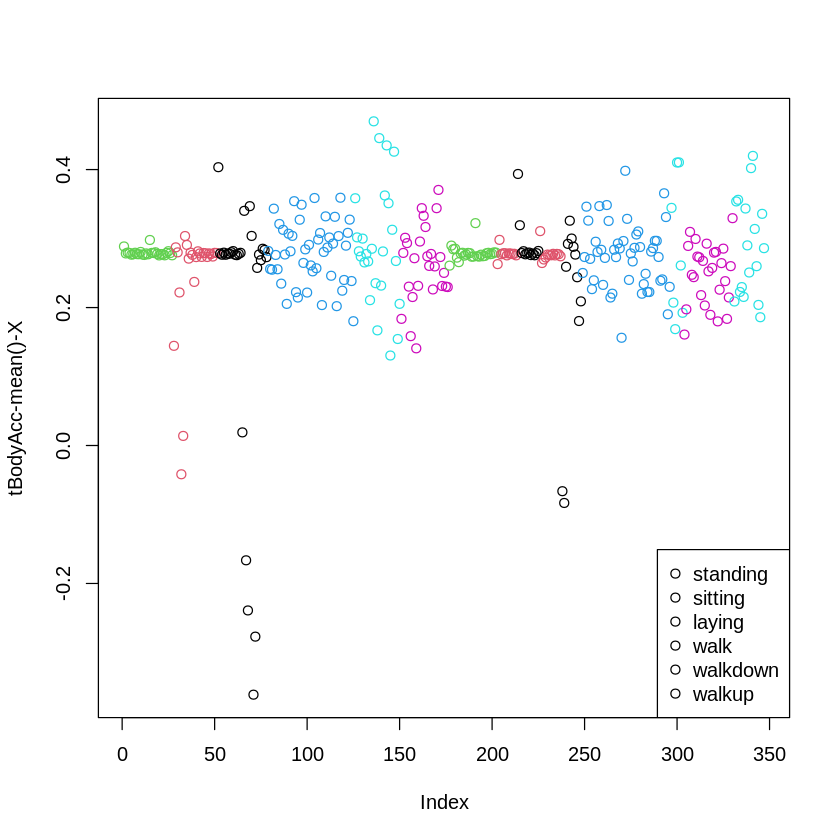

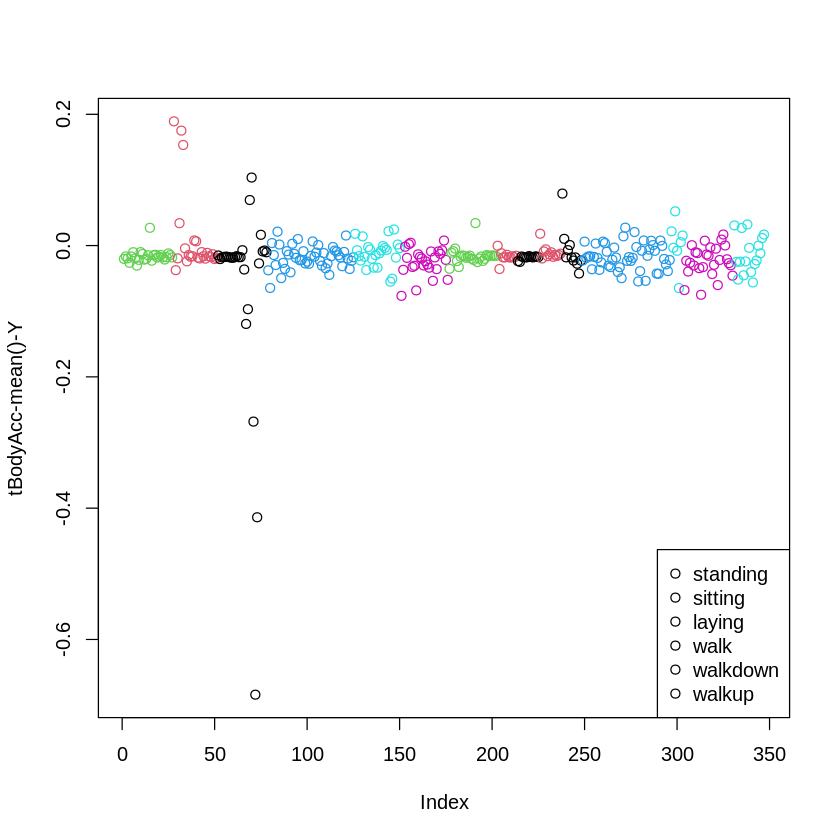

In [9]:
# plotting the average accelearation

plot(sub1[,1], col = sub1$activity, ylab = names(sub1)[1])
legend("bottomright", legend = unique(sub1$activity, col = unique(sub1$activity)),
pch=1)

plot(sub1[,2], col = sub1$activity, ylab = names(sub1)[2])
legend("bottomright", legend = unique(sub1$activity, col = unique(sub1$activity)),
pch=1)

<p>Plotting average acceleration for first subject Plotting average acceleration for first subject does not show any clear patterns, the activities involving movement show more variation.</p>

<h2>Clustering based just on average acceleration<h2>

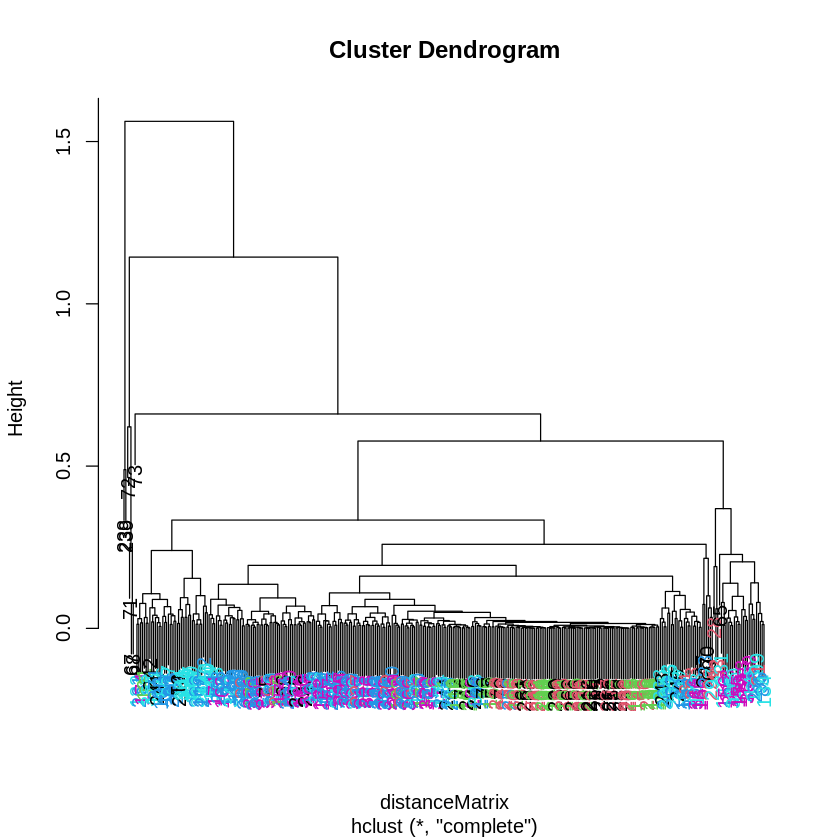

In [11]:
source("/content/myplclust.R")
distanceMatrix <- dist(samsungData[samsungData$subject==1,1:3])
hclustering <- hclust(distanceMatrix)
# Assuming 'activity' column in samsungData has numeric values
numericActivity <- as.numeric(samsungData$activity)
myplclust(hclustering,lab.col=numericActivity)

<p>The dendrogram is not very informative as the average acceleration feature does not seem to be able to discriminate between the six variables here.</p>

<h2>Plotting max acceleration for the first subject Plotting max acceleration for the first subject</h2>

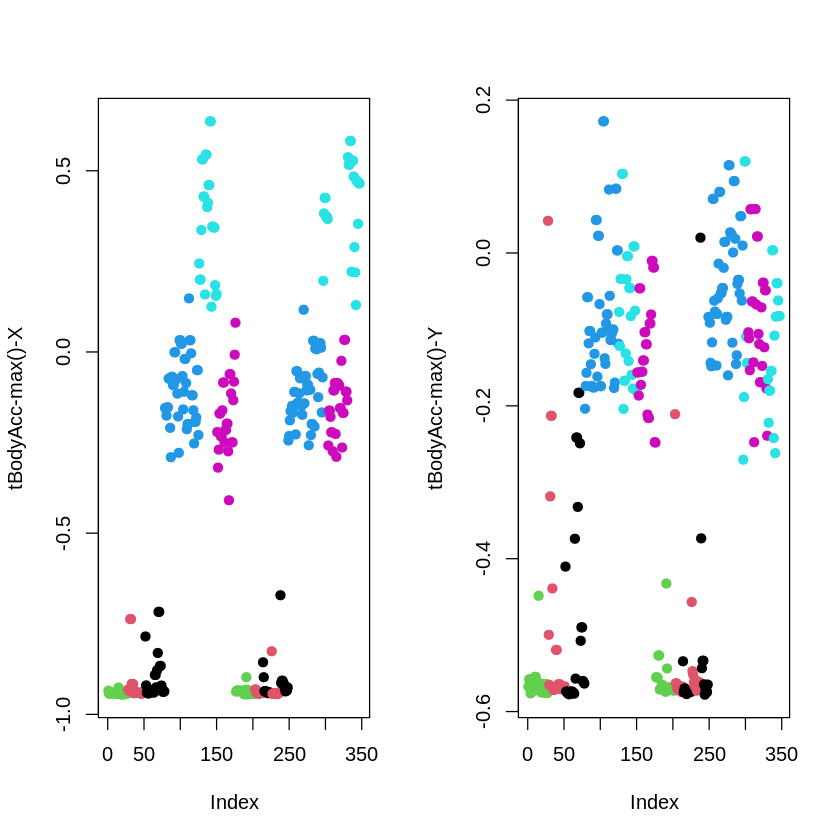

In [12]:
par(mfrow=c(1,2))
plot(samsungData[samsungData$subject==1,10],pch=19,col=numericActivity,ylab=names(samsungData)[10])
plot(samsungData[samsungData$subject==1,11],pch=19,col=numericActivity,ylab=names(samsungData)[11])

<h2>cluster based on maximum acceleration</h2>

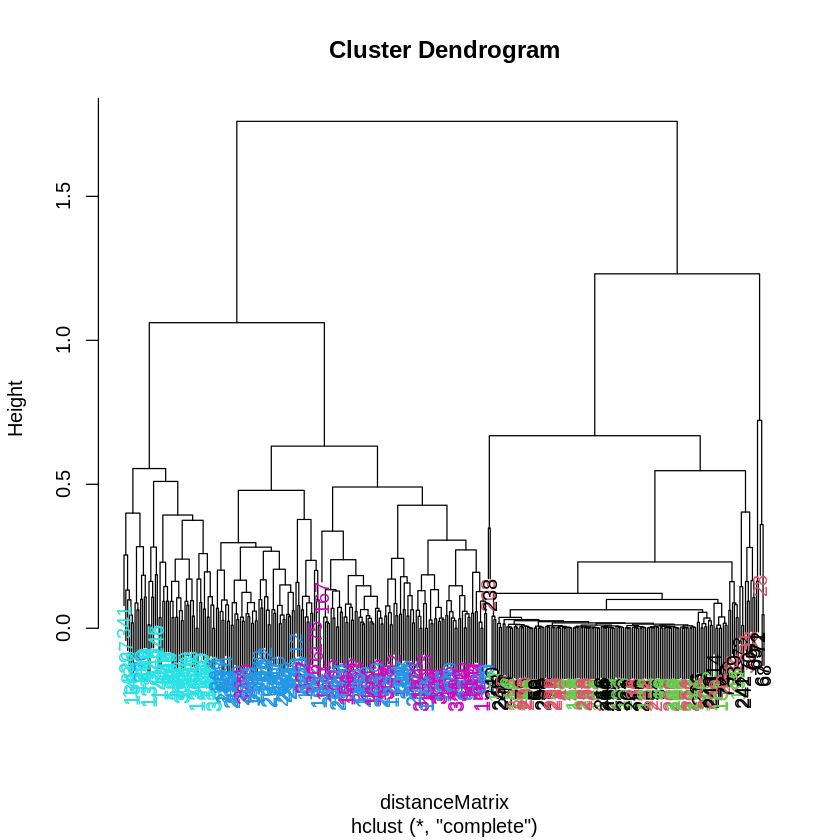

In [13]:
distanceMatrix <- dist(samsungData[samsungData$subject==1,10:12])
hclustering <- hclust(distanceMatrix)
myplclust(hclustering,lab.col=numericActivity)

<h2>Singular value decomposition</h2>

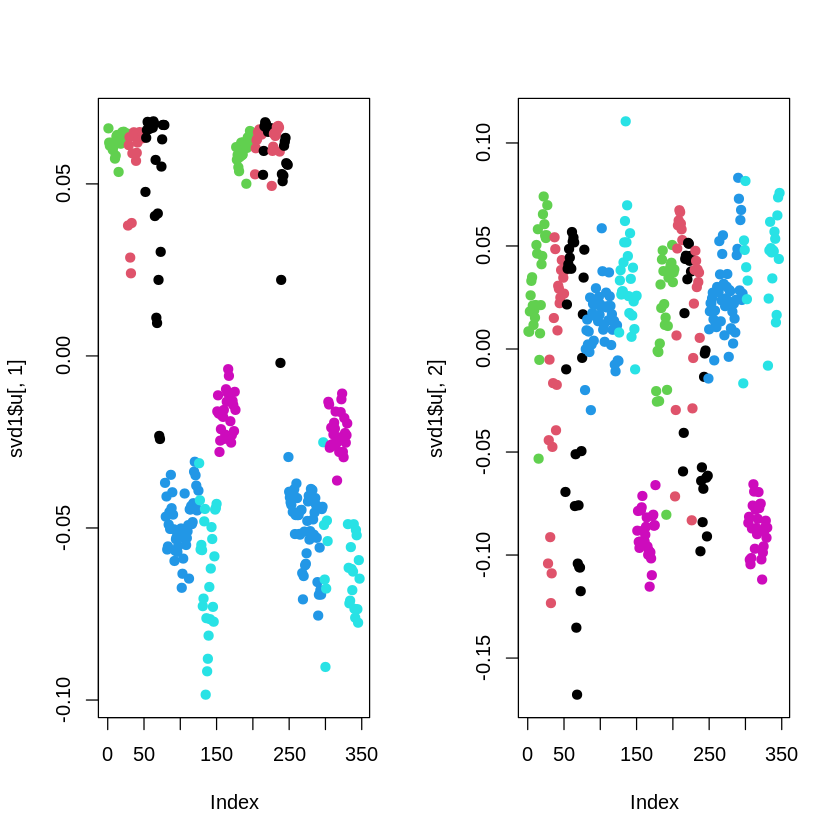

In [14]:
svd1 = svd(scale(samsungData[samsungData$subject==1,-c(562,563)]))
par(mfrow=c(1,2))
plot(svd1$u[,1],col=numericActivity,pch=19)
plot(svd1$u[,2],col=numericActivity,pch=19)

<p>The first vector, the second vector groups data at the top, then it thins down except for the purple dots (walk up) so it could be ordering by change in altitude. So we can use the second right singular vector to see the feature which impacts the distribution the most.</p>

<h2>Find maximum contributor</h2>

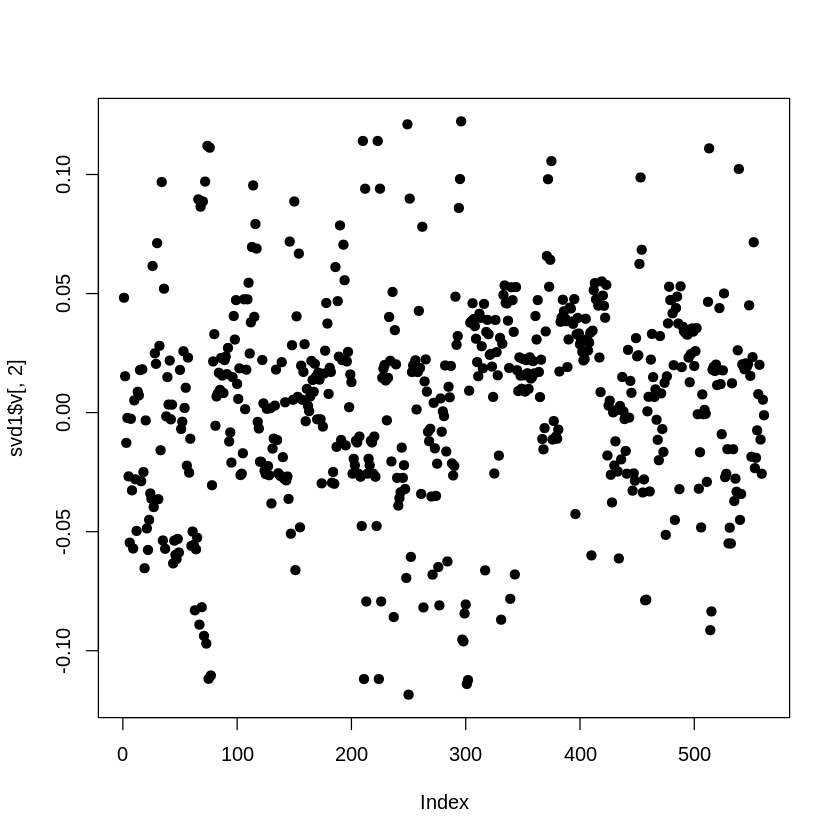

In [15]:
plot(svd1$v[,2],pch=19)

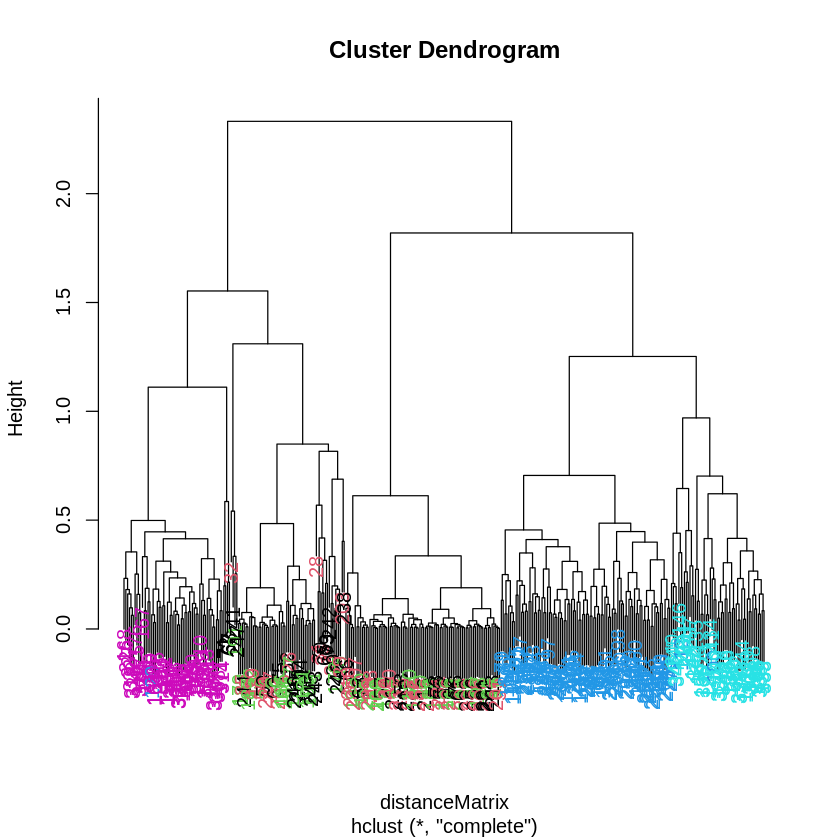

In [16]:
#New clustering with maximum contributer

maxContrib <- which.max(svd1$v[,2])
distanceMatrix <- dist(samsungData[samsungData$subject==1,c(10:12,maxContrib)])
hclustering <- hclust(distanceMatrix)
myplclust(hclustering,lab.col=numericActivity)

In [17]:
#movement activities

names(samsungData)[maxContrib]

[1] "fBodyAcc-meanFreq()-Z"

<h2>K-means clustering (nstart=1, first try)</h2>

In [18]:
kClust <- kmeans(samsungData[samsungData$subject==1,-c(562,563)],centers=6)
table(kClust$cluster,samsungData$activity[samsungData$subject==1])

   
    laying sitting standing walk walkdown walkup
  1     24      33       46    0        0      0
  2     10       2        0    0        0      0
  3     16      12        7    0        0      0
  4      0       0        0   95       49      0
  5      0       0        0    0        0     31
  6      0       0        0    0        0     22

<p>Cluster 3 is a mix of laying, sitting and standing, the rest are for single factors, repeating the clustering should give similar results.</p>

<h2>K-means clustering (nstart=100, first try)</h2>

In [19]:
kClust <- kmeans(samsungData[samsungData$subject==1,-c(562,563)],centers=6,nstart=100)
table(kClust$cluster,samsungData$activity[samsungData$subject==1])

   
    laying sitting standing walk walkdown walkup
  1     18      10        2    0        0      0
  2      0      37       51    0        0      0
  3      0       0        0   95        0      0
  4      0       0        0    0       49      0
  5     29       0        0    0        0      0
  6      3       0        0    0        0     53

<h2>K-means clustering (nstart=100, second try)</h2>

In [20]:
kClust <- kmeans(samsungData[samsungData$subject==1,-c(562,563)],centers=6,nstart=100)
table(kClust$cluster,samsungData$activity[samsungData$subject==1])

   
    laying sitting standing walk walkdown walkup
  1      0      37       51    0        0      0
  2     18      10        2    0        0      0
  3      3       0        0    0        0     53
  4      0       0        0   95        0      0
  5      0       0        0    0       49      0
  6     29       0        0    0        0      0

<p>The second attempt gives better results, in both cases we did not specify the starting point so K-means choose a random point by default.</p>

<h2>Cluster 1 Variable Centers (Laying)</h2>

In [21]:
kClust <- kmeans(samsungData[samsungData$subject==1,-c(562,563)],centers=6,nstart=100)
table(kClust$cluster,samsungData$activity[samsungData$subject==1])

   
    laying sitting standing walk walkdown walkup
  1      0      37       51    0        0      0
  2      3       0        0    0        0     53
  3     29       0        0    0        0      0
  4      0       0        0    0       49      0
  5     18      10        2    0        0      0
  6      0       0        0   95        0      0

<p>so we see that walking down is cluster 6 & walking up is cluster 2, we can see can now use this to find the features that class the activity.</p>

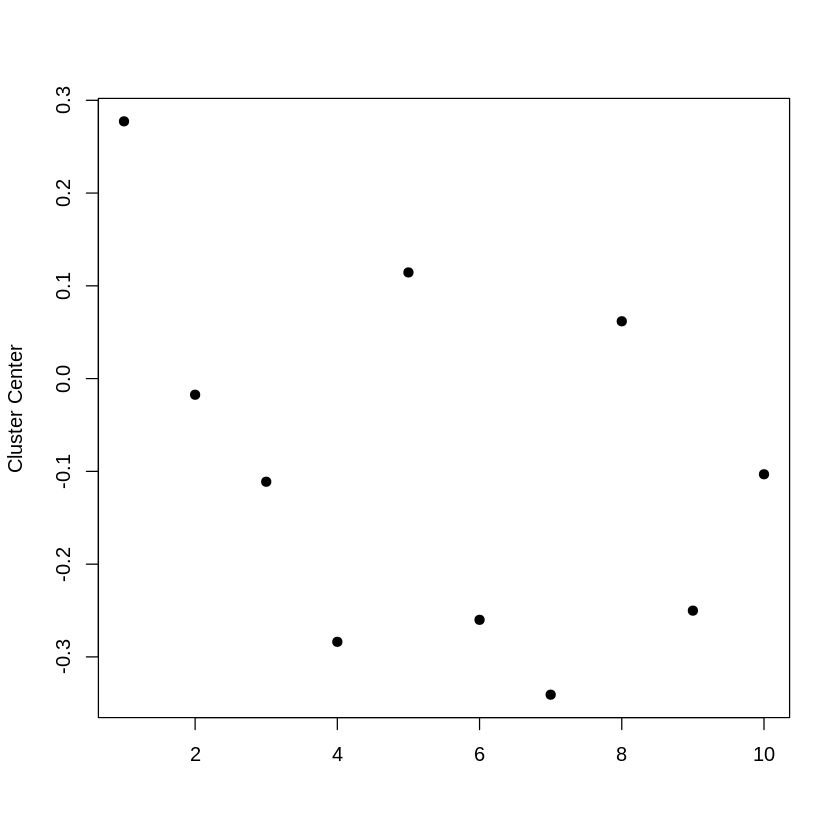

In [22]:
plot(kClust$center[6,1:10],pch=19,ylab="Cluster Center",xlab="")

<p>plotted, features 1 & 10 are weigh more in clasifying walking down is very different, most features have</p>

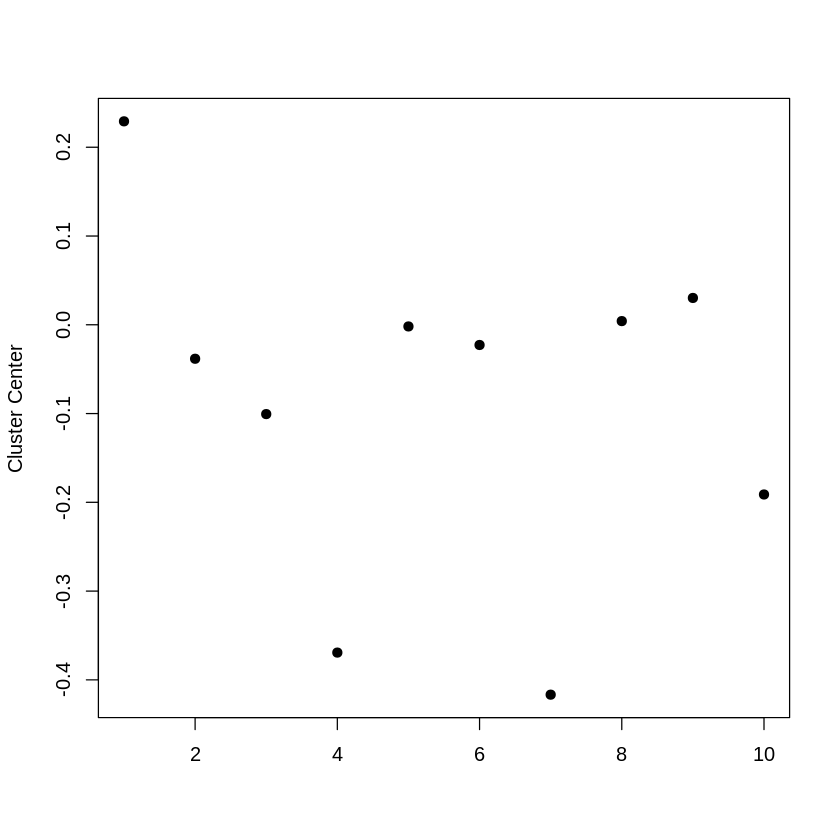

In [23]:
plot(kClust$center[2,1:10],pch=19,ylab="Cluster Center",xlab="")